Variance Inflation Factors (VIF):
             Feature           VIF
0   Injection_timing   8080.266190
1  Injector_pressure    238.194082
2        Temperature  74260.740669
3                EGT   2283.107508
4                 VE  60976.680196
5                 CL   2854.838317
BTE = 0.300 + (0.010 * Injection_timing) + (0.020 * Injector_pressure) + (-0.002 * Temperature) + (-0.000 * EGT) + (-0.000 * VE) + (0.000 * CL)
R-squared: 1.0
Mean Squared Error: 5.259072701473412e-31
Ridge Regression Coefficients: [ 5.07443263e-03  1.98691148e-02  1.62507890e-03 -3.77799820e-05
  1.63877909e-03  4.68782329e-05]
Lasso Regression Coefficients: [ 0.          0.01981004  0.         -0.00013526  0.         -0.        ]

Variance Inflation Factors (VIF) after Ridge and Lasso:
             Feature           VIF
0   Injection_timing   8080.266190
1  Injector_pressure    238.194082
2        Temperature  74260.740669
3                EGT   2283.107508
4                 VE  60976.680196
5                 

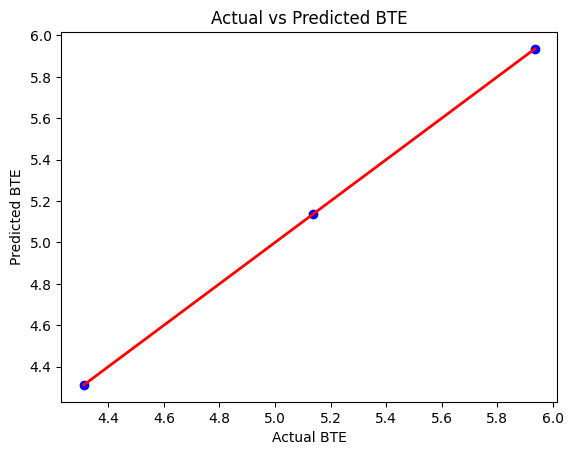

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso

# Provided data
data = {
    "Injection_timing": [27, 27, 27, 27, 27, 27, 27, 30, 30, 30, 30, 30, 30],
    "Injector_pressure": [190, 230, 270, 190, 190, 230, 270, 190, 190, 230, 230, 270, 270],
    "Temperature": [29, 30, 30.5, 29.5, 30, 30.5, 31, 31.5, 32, 32, 32.5, 32.5, 33],
    "EGT": [460, 450, 440, 400, 375, 350, 325, 340, 320, 320, 300, 300, 280],
    "VE": [78, 80, 82, 75.5, 76.5, 77.5, 78.5, 79, 79.5, 79.5, 80, 80, 81],
    "CL": [4.5, 4.3, 4.1, 3.4, 3.2, 3, 2.8, 3, 2.8, 2.8, 2.6, 2.6, 2.4],
    "BTE": [4.312, 5.11, 5.909, 4.311, 4.31, 5.109, 5.908, 4.337, 4.336, 5.136, 5.135, 5.935, 5.934]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define independent variables (features) and dependent variable (target)
X = df[["Injection_timing", "Injector_pressure", "Temperature", "EGT", "VE", "CL"]]
y = df["BTE"]

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Extract the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the regression equation
equation = "BTE = {:.3f}".format(intercept)
for i, col in enumerate(X.columns):
    equation += " + ({:.3f} * {})".format(coefficients[i], col)

print(equation)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print R-squared and MSE values
print("R-squared:", r2)
print("Mean Squared Error:", mse)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
print("Ridge Regression Coefficients:", ridge_model.coef_)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
print("Lasso Regression Coefficients:", lasso_model.coef_)

# Check for multicollinearity using VIF after Ridge and Lasso
# Recalculate VIF after regularization
vif_data_ridge = pd.DataFrame()
vif_data_ridge['Feature'] = X.columns
vif_data_ridge['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF) after Ridge and Lasso:")
print(vif_data_ridge)

# Plot the regression results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual BTE')
plt.ylabel('Predicted BTE')
plt.title('Actual vs Predicted BTE')
plt.show()





In [3]:
import pickle
filename = 'bte_model.sav'
pickle.dump(model, open(filename, 'wb'))